# Feature selection


**Table of contents** 

**chapter 1: Litteratur**

1. the meaning of feature selection 
2. the purpose of feature selection
3. Methods:
    
    1. SelectKbest- How does it  work?
    2. Selectpercentile- How does it work?
    3. SelectKbest vs selectpercentile  
        1. in wich senario we use SelectKBest?
        2. where is the focus of selectkbest?
        3. K Best
        4. f-classif,mutual_info_classif
            1. difference
            2. effect
    
4. Evaluation matrics
    1. accuray score 
    2. f1 score
    3. recall score
    4. jaccard_score
    5. precision score
    

**chapter 1: Usage all features** 
1. Data description 
2. verify the existence of null value
3. Shape
4. Plotten
    1. Target variable- Heart Attack
    2. Gender
    3. Fasting Blood Sugar
    4. Age vs Chest Pain type
    5. Age vs Cholesterol
    6. age vs Resting Blood Sugar
5. Extract the input variable and Target variable
6. Splitting the Dataset- Training vs Test
7. Logistic regression
    1. Predicted Value
    2. predicted proba
    3. Confusion Metrics
    4. Evaluation score
10. Classification threshold
    1. Adjsting Threshold
    2. Evaluation metrics
    3. ROC und AUC
    4. plotten
    

**chapter 3: apply Feature selection**
1. mutual_info_classif
    1. plotten selective feature
    2. logistic regression 
    3. Evalution metric
2. f_classif
    1. plotten selective feature
    2. logistic regression 
    3. Evalution metric
3. chi2
    1. plotten selective feature
    2. logistic regression 
    3. Evalution metric
4. pearon correlation
    1. plotten selective feature
    2. logistic regression 
    3. Evalution metric
    
5. Auc und ROC curve in mutual_info_classif
6. Auc und ROC curve in f_classif
7.Auc und ROC curve in chi2





    

## Dataset : Heart-Rate Prediction
### **Dataset from** :[ https://www.kaggle.com/faisalmohmmed/heart-rate-prediction-by-using-5-models ]
### Description
<a id="infos"></a>
* Age - Age of the person
* Sex - Gender of the person
* cp - Chest Pain type 
* trtbps - Resting Blood pressure in mm Hg
* chol - Cholestrol in mg/df fetched via BMI sensor
* fbs - Fasting blood sugar > 120 (in mg/dl)(1 - true ; 0 - false)
* restecg - resting electrocardiographic results
* thalachh - Maximum heart rate achieved
* exng - exercise induced angnia (1 - true ; 0 - false)
* oldpeak - previous peak
* slp - Slope
* caa - number of major vessels
* thall - Thal rate
* Output - Target variable

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif


In [2]:
df=pd.read_csv("Datasets/heart.csv")

##### Print the Data
[for more information about the input variable, click her](#infos)
    

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Data description


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Shape

In [5]:

print('Number of columns :{}'.format(df.shape[0]))
print('Number of rows {} :'.format(df.shape[1]))

Number of columns :303
Number of rows 14 :



##### verify the existence of null value

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

##### Plotten :
1. target variable- Heart Attack

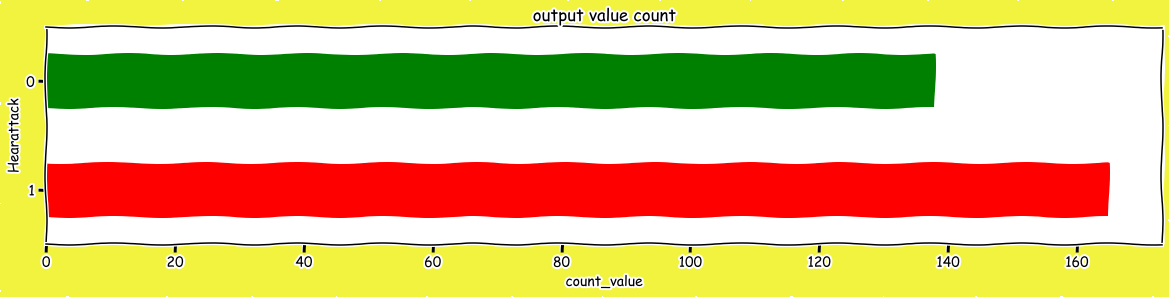

In [7]:
with plt.xkcd():
        plt.figure(figsize=(20,4),facecolor='#f1f33f')
        df.output.value_counts().plot(kind='barh',color=['red','green'])
        
        plt.title('output value count')
        plt.xlabel('count_value')
        plt.ylabel('Hearattack')


2. Gender

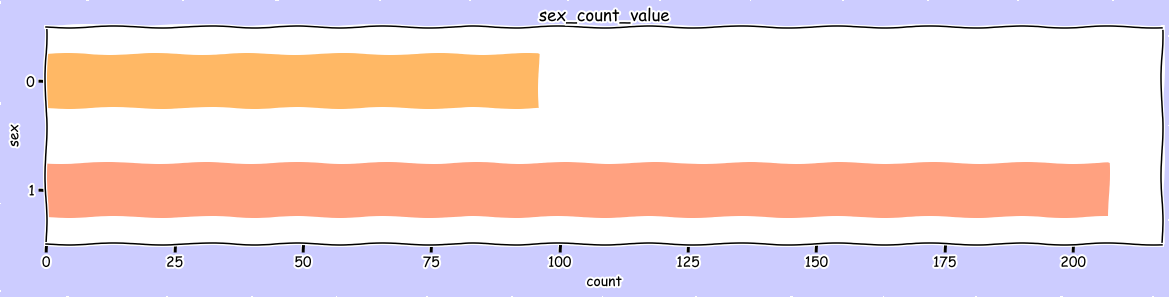

In [8]:

with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#ccccff')
    df.sex.value_counts().plot(kind='barh',color=['#ffa180','#ffb865'],label='female')
    plt.title('sex_count_value')
    plt.xlabel('count')
    plt.ylabel('sex')
    
    plt.show()
        
    

3. Fasting Blood Sugar

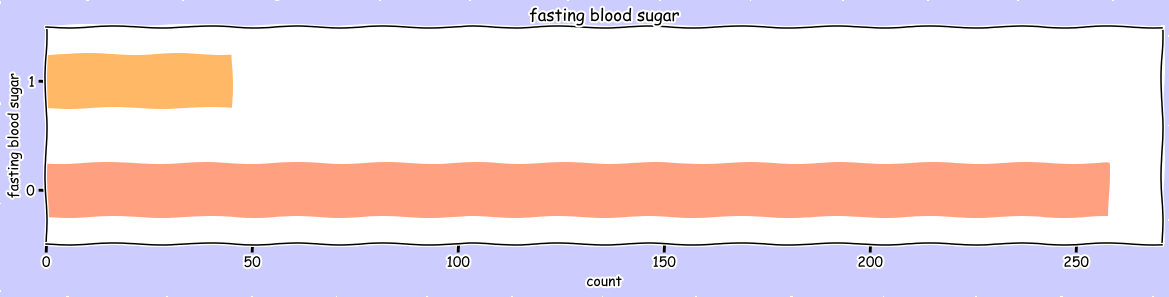

In [9]:
with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#ccccff')
    df.fbs.value_counts().plot(kind='barh',color=['#ffa180','#ffb865'])
    
    plt.title('fasting blood sugar')
    plt.xlabel('count')
    plt.ylabel('fasting blood sugar')
    


4. Age vs Chest Pain Type



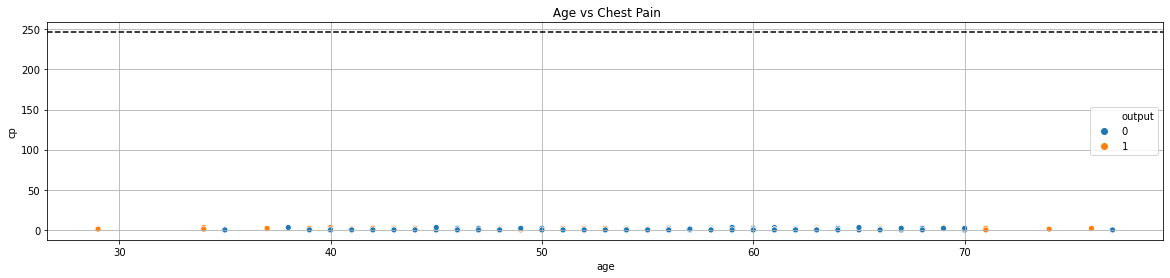

In [10]:
plt.figure(figsize=(20,4))
sns.scatterplot(x=df['age'],y=df['cp'],hue=df['output'])
plt.xlabel('age')
plt.ylabel('cp')
plt.title(' Age vs Chest Pain')
plt.axhline(df['chol'].mean(),linestyle='--',color='black')
plt.grid()

5. Age vs Cholesterol

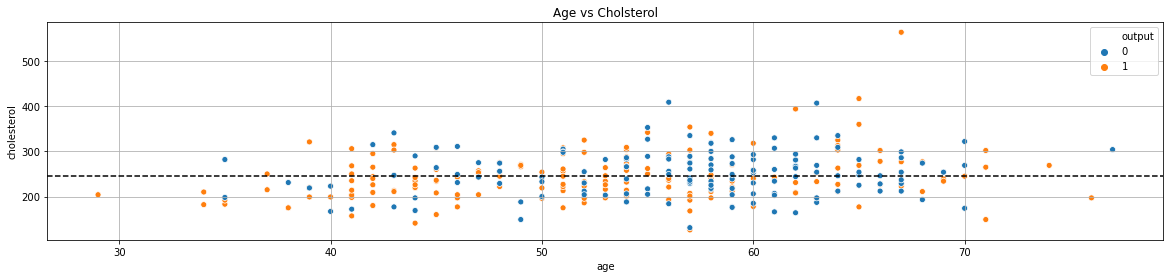

In [11]:

plt.figure(figsize=(20,4))
sns.scatterplot(x=df['age'],y=df['chol'],hue=df['output'])
plt.xlabel('age')
plt.ylabel('cholesterol')
plt.title('Age vs Cholsterol')
plt.axhline(df['chol'].mean(),linestyle='--',color='black')
plt.grid(True)


6. Age vs Resting Blood Pressure

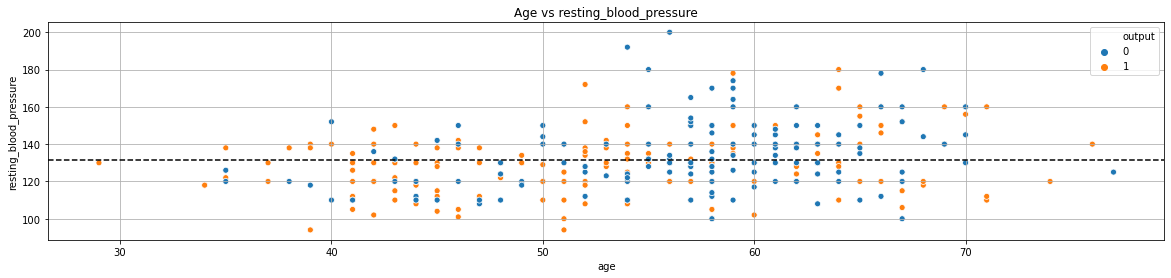

In [12]:
plt.figure(figsize=(20,4))
sns.scatterplot(x=df['age'],y=df['trtbps'],hue=df['output'])
plt.xlabel('age')
plt.ylabel('resting_blood_pressure')
plt.title('Age vs resting_blood_pressure')
plt.axhline(df['trtbps'].mean(),linestyle='--',color='black')
plt.grid(True)
plt.show()

##### Extract the input variable und target variable:


In [13]:
target_col="output"
X=df.iloc[:,df.columns!=target_col]
Y=df.iloc[:,-1]

print('the Number of input variable {} :'. format(X.shape[1]))
print('the Number of target  variable {} :'. format(df.shape[1]-X.shape[1]))



the Number of input variable 13 :
the Number of target  variable 1 :


##### Splitting the dataset Train _ Test  und  get_size:



In [14]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print('the number of rows in training data are : {}'.format(X_train.shape[0]))
print('the number of rows in test data are : {}'.format(X_test.shape[0]))




the number of rows in training data are : 212
the number of rows in test data are : 91


#### Logistic regression :
1. predicted Value for defaulted threshold=**0.5**


In [15]:
lr=LogisticRegression(C=0.10,solver='liblinear').fit(X_train,Y_train)
Y_predicted=lr.predict(X_test)
print(' predicted value when Threshold = 0.5 is :  \n{}'.format(Y_predicted))


 predicted value when Threshold = 0.5 is :  
[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1]


2. preditecd proba 

In [16]:
proba =lr.predict_proba(X_test)
print('predicted probability for the first 5 predicted value are : \n {}'.format(proba[0:5]))

predicted probability for the first 5 predicted value are : 
 [[0.78953651 0.21046349]
 [0.23416866 0.76583134]
 [0.22576125 0.77423875]
 [0.93458127 0.06541873]
 [0.18467127 0.81532873]]


* Observation:
1. column 0: predicted probability that each observation is a member of class 0
2. column 1: predicted probability that each observation is a member of class 1

##### Confusion matrix :
* Basic terminology: 
1. True Positives : we correctly predicted that they do have heart disease:  **44**
2. True Negatives : we correctly predicted that they don't have heart disease : **34**
3. False Positives: we incorrectly predicted that they do have diabetes (a "Type I error"): **7**
4. False Negatives: we incorrectly predicted that they don't have heart disease (a "Type II error"): **6**

In [17]:
confusion_matrice=confusion_matrix(Y_test,Y_predicted)
print('confusion matrice for threshold = 0.5 is: \n{}'.format(confusion_matrice))


confusion matrice for threshold = 0.5 is: 
[[34  7]
 [ 6 44]]


##### Evaluation metrics :

In [18]:
cl_report =classification_report(Y_test,Y_predicted)
print('Classification report for theshold = 0.5 is :\n {}'.format(cl_report))
TN=confusion_matrice[0,0]
FP=confusion_matrice[0,1]
FN=confusion_matrice[1,0]
TP=confusion_matrice[1,1]
specify=TN/(TN+FP)
print('specify score for threshold 0.5 ist :{}'.format(specify))

Classification report for theshold = 0.5 is :
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91

specify score for threshold 0.5 ist :0.8292682926829268


##### Classification Threshold :
1. select the predicted probality for class 1 and class 0

In [19]:
predicted_class0=proba[:,0]
predicted_class1=proba[:,1]
print(' the fist 5 predicted probality for class 1 is : \n {}'.format(predicted_class1[0:5]))
print(' the fist 5 predicted probality for class 0 is : \n {}'.format(predicted_class0[0:5]))


 the fist 5 predicted probality for class 1 is : 
 [0.21046349 0.76583134 0.77423875 0.06541873 0.81532873]
 the fist 5 predicted probality for class 0 is : 
 [0.78953651 0.23416866 0.22576125 0.93458127 0.18467127]


2. Adjusing the classification treshold for predicted_class1 of **0.3**

In [20]:
from sklearn.preprocessing import binarize

y_pred_class1=binarize([predicted_class1],threshold=0.3)[0]
print(' predicted value for threshold = 0.3 is : \n {}'.format(y_pred_class1))

 predicted value for threshold = 0.3 is : 
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.]


3. Confusion Matrix for the classification threshold **0.3**



In [21]:
Confusion_matrix_threshold03=confusion_matrix(Y_test,y_pred_class1)
print('the confusion matrix for thresohold = 0.3 is: \n {}'.format(Confusion_matrix_threshold03))



the confusion matrix for thresohold = 0.3 is: 
 [[32  9]
 [ 4 46]]


4. Evaluation metrics:



In [22]:
cl_report03 =classification_report(Y_test,y_pred_class1)

TN=Confusion_matrix_threshold03[0,0]
FP=Confusion_matrix_threshold03[0,1]
FN=Confusion_matrix_threshold03[1,0]
TP=Confusion_matrix_threshold03[1,1]
specify=TN/(TN+FP)
print('classification report for threshold = 0.3 is : \n{}'.format(cl_report03))
print('specify score for threshold 0.3 ist :{}'.format(specify))



classification report for threshold = 0.3 is : 
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        41
           1       0.84      0.92      0.88        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91

specify score for threshold 0.3 ist :0.7804878048780488


##### ROC and AUC
* Roc enables uns to see  how the  sensivity and specify  change in different threshold

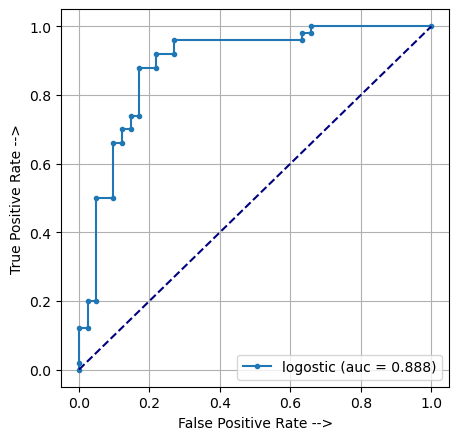

In [23]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(5,5),dpi=100)
Fp,Tp,threshold=metrics.roc_curve(Y_test,predicted_class1)
auc_logistic=auc(Fp,Tp)
plt.plot(Fp,Tp,marker='.',label='logostic (auc = %0.3f)' % auc_logistic)
plt.legend()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.grid()
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.show()

In [24]:
def evaluate_threshold(thr):
    print('True Positive:', Tp[threshold > thr][-1])
    print('False positive:', 1 - Fp[threshold > thr][-1])
    
evaluate_threshold(0.3)


True Positive: 0.92
False positive: 0.7804878048780488


* Conclusion :
    1. Threshold can be any Number, it is  absolutely depends on what we  want , do we want that out model predict Tp or FP ...
    

## Feature Selection:
* mutual_info_classif
* Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
* The mutual information between two random variables X and Y can be stated formally as follows:
* **I(X ; Y) = H(X) – H(X | Y)** Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.


1. Determine the mutual information:

In [25]:
mutual_info=mutual_info_classif(X_train,Y_train)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

thall       0.128333
caa         0.101206
cp          0.097282
exng        0.095094
slp         0.084466
thalachh    0.081008
oldpeak     0.080556
sex         0.016765
chol        0.013726
restecg     0.008680
age         0.000000
trtbps      0.000000
fbs         0.000000
dtype: float64

In [26]:
def feature_selection_mutual_info(mutual_info_classif,X_train,Y_train,X_test):
    fs=SelectKBest(mutual_info_classif,k='all')
    fs.fit(X_train,Y_train)
    X_train_tr=fs.transform(X_train)
    X_test_tr=fs.transform(X_test)
    return fs,X_train_tr,X_test_tr
fs,X_train_tr,X_test_tr=feature_selection_mutual_info(mutual_info_classif,X_train,Y_train,X_test)

2. plotten mutual_info

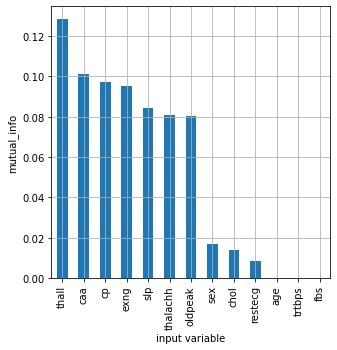

In [27]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(5, 5))
plt.xlabel('input variable')
plt.ylabel('mutual_info')
plt.grid()
plt.show()

* After selectKBest i see that the best feature selection are:
    


In [28]:
X_train_mutual=X_train[['cp', 'slp','thall','caa']]
X_test_mutual=X_test[['cp', 'slp','thall','caa']]

lr_mutual=LogisticRegression(C=0.10,solver='liblinear').fit(X_train_mutual,Y_train)
Y_predicted_mutual=lr_mutual.predict(X_test_mutual)
print(' predicted value when Threshold = 0.5 is :  \n{}'.format(Y_predicted_mutual))

proba_mutual =lr_mutual.predict_proba(X_test_mutual)
print('predicted probability for the first 5 predicted value are : \n {}'.format(proba_mutual[0:5]))

confusion_matrice=confusion_matrix(Y_test,Y_predicted_mutual)
print('confusion matrice for threshold = 0.5 is: \n{}'.format(confusion_matrice))

cl_report =classification_report(Y_test,Y_predicted_mutual)
print('Classification report for theshold = 0.5 is :\n {}'.format(cl_report))
TN=confusion_matrice[0,0]
FP=confusion_matrice[0,1]
FN=confusion_matrice[1,0]
TP=confusion_matrice[1,1]
specify=TN/(TN+FP)
print('specify score for threshold 0.5 ist :{}'.format(specify))

 predicted value when Threshold = 0.5 is :  
[0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1]
predicted probability for the first 5 predicted value are : 
 [[0.59682478 0.40317522]
 [0.21282472 0.78717528]
 [0.34463717 0.65536283]
 [0.91104614 0.08895386]
 [0.22676568 0.77323432]]
confusion matrice for threshold = 0.5 is: 
[[32  9]
 [11 39]]
Classification report for theshold = 0.5 is :
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        41
           1       0.81      0.78      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

specify score for threshold 0.5 ist :0.7804878048780488


In [29]:
def feature_selection_f_classif(X_train,X_test,Y_train):
    feature_selection=SelectKBest(f_classif,k='all')
    feature_selection.fit(X_train,Y_train)
    X_train_fs=feature_selection.transform(X_train)
    X_test_fs=feature_selection.transform(X_test)
    return feature_selection,X_train_fs,X_test_fs

feature_selection,X_train_fs,X_test_fs=feature_selection_f_classif(X_train,X_test,Y_train)



In [31]:
list=[]
for i in range(len(feature_selection.scores_)):
    n=  feature_selection.scores_[i]
    list.append(n)
list=pd.Series(list)
list.index=X_train.columns
print(list.sort_values(ascending=False))

exng        57.695455
cp          48.595744
oldpeak     48.507719
caa         46.812055
thalachh    40.926955
thall       37.686422
slp         28.241185
sex         20.580859
age         11.108511
restecg      1.462049
chol         0.598771
trtbps       0.593974
fbs          0.310900
dtype: float64


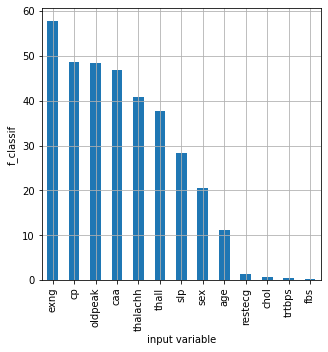

In [32]:
list.sort_values(ascending=False).plot.bar(figsize=(5, 5))
plt.xlabel('input variable')
plt.ylabel('f_classif')
plt.grid()

In [33]:
X_train_f_classif=X_train[['exng', 'cp','oldpeak','caa']]
X_test_f_classif=X_test[['exng', 'cp','oldpeak','caa']]

lr_f_classif=LogisticRegression(C=0.10,solver='liblinear').fit(X_train_f_classif,Y_train)
Y_predicted_f_classif=lr_f_classif.predict(X_test_f_classif)
print(' predicted value when Threshold = 0.5 is :  \n{}'.format(Y_predicted_f_classif))

proba_f_classif =lr_f_classif.predict_proba(X_test_f_classif)
print('predicted probability for the first 5 predicted value are : \n {}'.format(proba_f_classif[0:5]))

confusion_matrice=confusion_matrix(Y_test,Y_predicted_f_classif)
print('confusion matrice for threshold = 0.5 is: \n{}'.format(confusion_matrice))

cl_report =classification_report(Y_test,Y_predicted_f_classif)
print('Classification report for theshold = 0.5 is :\n {}'.format(cl_report))
TN=confusion_matrice[0,0]
FP=confusion_matrice[0,1]
FN=confusion_matrice[1,0]
TP=confusion_matrice[1,1]
specify=TN/(TN+FP)
print('specify score for threshold 0.5 ist :{}'.format(specify))

 predicted value when Threshold = 0.5 is :  
[0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1]
predicted probability for the first 5 predicted value are : 
 [[0.74821253 0.25178747]
 [0.0728468  0.9271532 ]
 [0.23824269 0.76175731]
 [0.92245361 0.07754639]
 [0.2182485  0.7817515 ]]
confusion matrice for threshold = 0.5 is: 
[[35  6]
 [11 39]]
Classification report for theshold = 0.5 is :
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.87      0.78      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91

specify score for threshold 0.5 ist :0.8536585365853658


In [34]:
from functools import partial
from sklearn.feature_selection import chi2
def feature_selection_chi2(X_train,X_test,Y_train):

    feature_selection=SelectKBest(chi2,k='all')
    feature_selection.fit(X_train,Y_train)
    X_train_fs=feature_selection.transform(X_train)
    X_test_fs=feature_selection.transform(X_test)
    return feature_selection,X_train_fs,X_test_fs

feature_selection,X_train_fs,X_test_fs=feature_selection_chi2(X_train,X_test,Y_train)


In [632]:
list=[]
for i in range(len(feature_selection.scores_)):
    n=  feature_selection.scores_[i]
    list.append(n)
list=pd.Series(list)
list.index=X_train.columns
print(list.sort_values(ascending=False))

thalachh    118.649970
caa          54.201904
oldpeak      46.526396
cp           42.055121
exng         31.035811
age          16.487696
chol          7.233331
slp           6.657224
sex           6.426474
thall         4.877253
trtbps        1.321408
restecg       0.747133
fbs           0.273483
dtype: float64


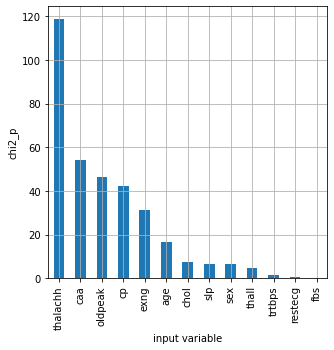

In [633]:
list.sort_values(ascending=False).plot.bar(figsize=(5, 5))
plt.xlabel('input variable')
plt.ylabel('chi2_p')
plt.grid()

In [636]:
X_train_chi2=X_train[['thalachh', 'cp','oldpeak','caa']]
X_test_chi2=X_test[['thalachh', 'cp','oldpeak','caa']]

lr_chi2=LogisticRegression(C=0.10,solver='liblinear').fit(X_train_chi2,Y_train)
Y_predicted_chi2=lr_chi2.predict(X_test_chi2)
print(' predicted value when Threshold = 0.5 is :  \n{}'.format(Y_predicted_chi2))

proba_chi2 =lr_chi2.predict_proba(X_test_chi2)
print('predicted probability for the first 5 predicted value are : \n {}'.format(proba_chi2[0:5]))

confusion_matrice=confusion_matrix(Y_test,Y_predicted_chi2)
print('confusion matrice for threshold = 0.5 is: \n{}'.format(confusion_matrice))

cl_report =classification_report(Y_test,Y_predicted_chi2)
print('Classification report for theshold = 0.5 is :\n {}'.format(cl_report))
TN=confusion_matrice[0,0]
FP=confusion_matrice[0,1]
FN=confusion_matrice[1,0]
TP=confusion_matrice[1,1]
specify=TN/(TN+FP)
print('specify score for threshold 0.5 ist :{}'.format(specify))

 predicted value when Threshold = 0.5 is :  
[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1
 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1]
predicted probability for the first 5 predicted value are : 
 [[0.66167397 0.33832603]
 [0.07090644 0.92909356]
 [0.21763275 0.78236725]
 [0.89097097 0.10902903]
 [0.23694717 0.76305283]]
confusion matrice for threshold = 0.5 is: 
[[35  6]
 [ 9 41]]
Classification report for theshold = 0.5 is :
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.87      0.82      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91

specify score for threshold 0.5 ist :0.8536585365853658


In [637]:
train_x=pd.concat([X_train,Y_train],axis=1)


In [638]:
def plot_join_plot(data,feature,target):
    j=sns.jointplot(feature,target,data=train_x,kind='scatter')
    j.annotate(stats.pearsonr)
    return plt.show()
    

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')


C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


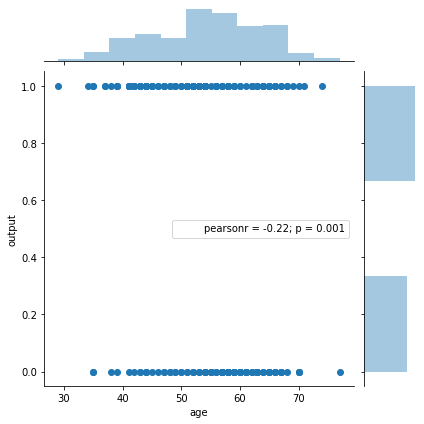

C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


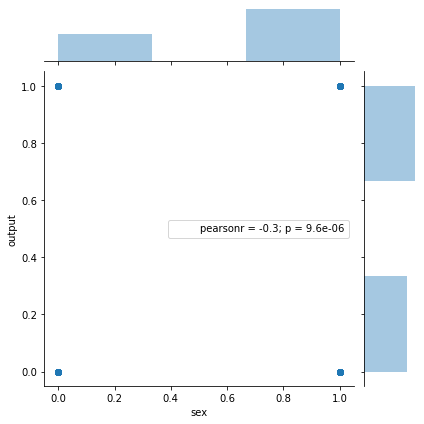

C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


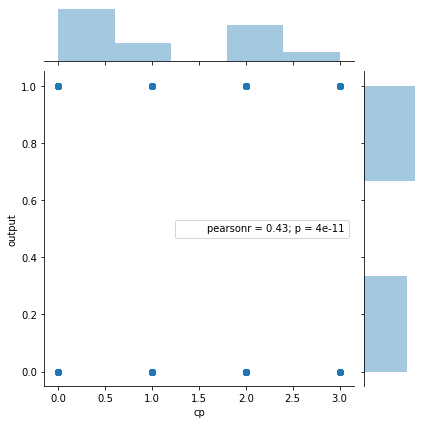

C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


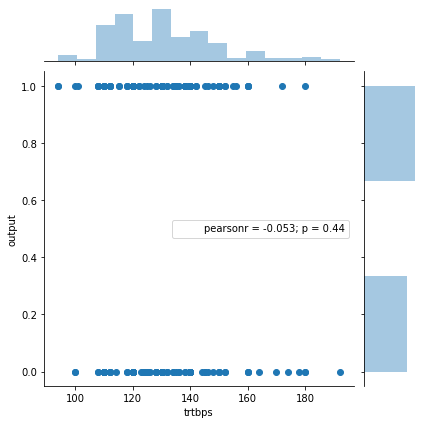

C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


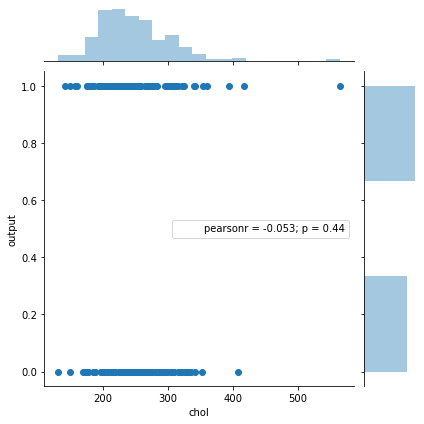

C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


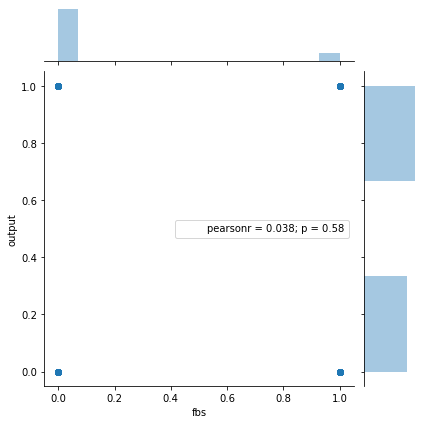

C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


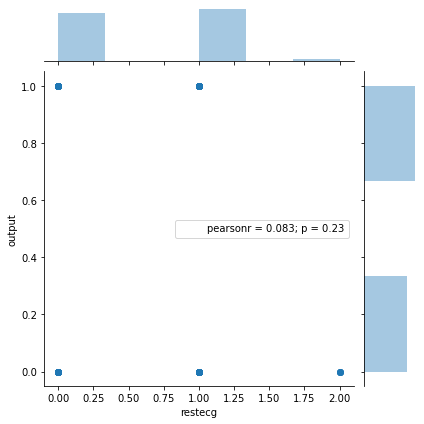

C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


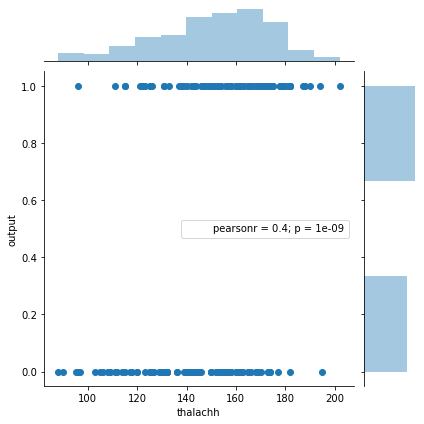

C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


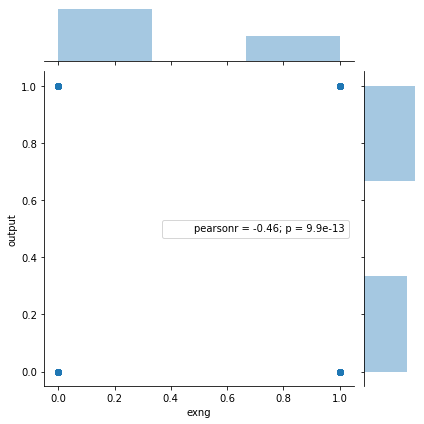

C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


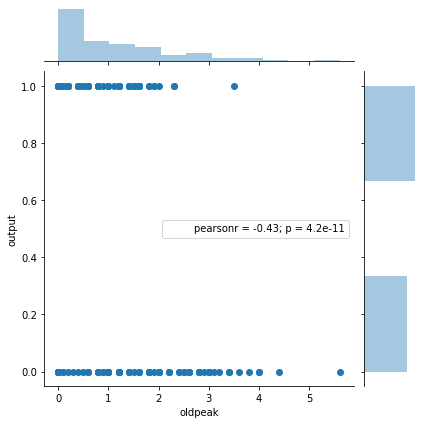

C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


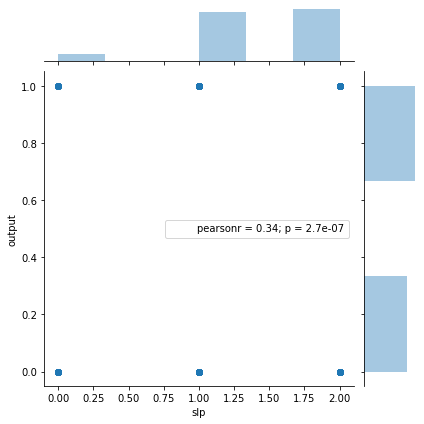

C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


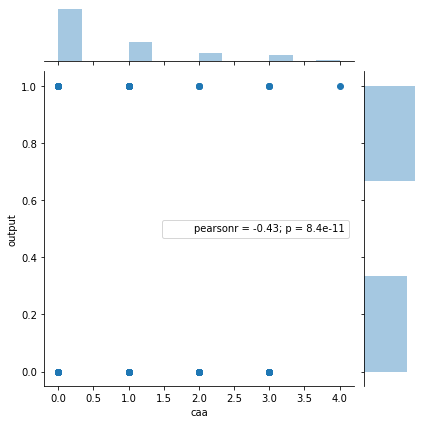

C:\Users\sahassou\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


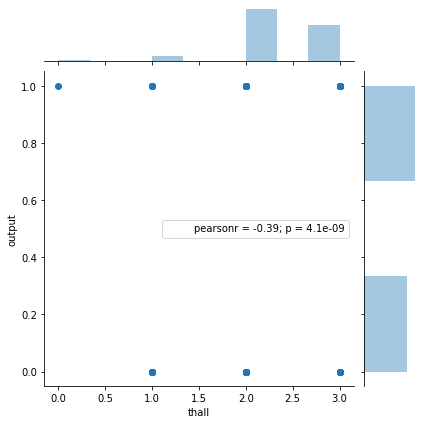

In [642]:
print(X_train.columns)
plot_join_plot(train_x,'age',Y_train)
plot_join_plot(train_x,'sex',Y_train)
plot_join_plot(train_x,'cp',Y_train)
plot_join_plot(train_x,'trtbps',Y_train)
plot_join_plot(train_x,'chol',Y_train)
plot_join_plot(train_x,'fbs',Y_train)
plot_join_plot(train_x,'restecg',Y_train)
plot_join_plot(train_x,'thalachh',Y_train)
plot_join_plot(train_x,'exng',Y_train)
plot_join_plot(train_x,'oldpeak',Y_train)
plot_join_plot(train_x,'slp',Y_train)
plot_join_plot(train_x,'caa',Y_train)
plot_join_plot(train_x,'thall',Y_train)

In [528]:
out_list_pearsonr=[]
for col in X_train.columns:
    corr_tuple=pearsonr(X_train[col],Y_train)
    out_list_pearsonr.append([col,corr_tuple[0],corr_tuple[1]])


        

In [529]:
data_corr=pd.DataFrame(out_list_pearsonr,columns=['feature','pearson','P_value'])
print('DataFrame shows pearsoncorrelation and p_value for each feature')
print(data_corr.head(13))



DataFrame shows pearsoncorrelation and p_value for each feature
     feature   pearson       P_value
0        age -0.224143  1.015528e-03
1        sex -0.298758  9.609953e-06
2         cp  0.433499  4.005545e-11
3     trtbps -0.053108  4.417528e-01
4       chol -0.053322  4.399175e-01
5        fbs  0.038448  5.777224e-01
6    restecg  0.083150  2.279639e-01
7   thalachh  0.403860  1.010867e-09
8       exng -0.464248  9.933925e-13
9    oldpeak -0.433180  4.154241e-11
10       slp  0.344297  2.726115e-07
11       caa -0.426944  8.406173e-11
12     thall -0.390069  4.089907e-09


In [645]:
data_corr.sort_values(by=['pearson'],ascending=True)
print(data_corr)



     feature   pearson       P_value
8       exng -0.464248  9.933925e-13
9    oldpeak -0.433180  4.154241e-11
11       caa -0.426944  8.406173e-11
12     thall -0.390069  4.089907e-09
1        sex -0.298758  9.609953e-06
0        age -0.224143  1.015528e-03
4       chol -0.053322  4.399175e-01
3     trtbps -0.053108  4.417528e-01
5        fbs  0.038448  5.777224e-01
6    restecg  0.083150  2.279639e-01
10       slp  0.344297  2.726115e-07
7   thalachh  0.403860  1.010867e-09
2         cp  0.433499  4.005545e-11


In [646]:
#Using selectKbest
X_train_after_SelectKbest=X_train[['chest_pain','exercice_inl_angina','depresion','N_major_vessels']]
X_test_after_SelectKbest=X_test[['chest_pain','exercice_inl_angina','depresion','N_major_vessels']]

lrg=LogisticRegression(C=0.10,solver='sag').fit(X_train_after_SelectKbest,Y_train)
y_hat_selectKBest=lrg.predict(X_test_after_SelectKbest)



KeyError: "None of [Index(['chest_pain', 'exercice_inl_angina', 'depresion', 'N_major_vessels'], dtype='object')] are in the [columns]"

In [61]:
print(y_hat_selectKBest)
print(lrg.predict_proba(X_test_after_SelectKbest))

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1
 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1]
[[0.71774965 0.28225035]
 [0.06962406 0.93037594]
 [0.22317498 0.77682502]
 [0.92317079 0.07682921]
 [0.20149826 0.79850174]
 [0.25936981 0.74063019]
 [0.45868552 0.54131448]
 [0.97912388 0.02087612]
 [0.96541916 0.03458084]
 [0.2587045  0.7412955 ]
 [0.36430414 0.63569586]
 [0.50036754 0.49963246]
 [0.21052253 0.78947747]
 [0.75608589 0.24391411]
 [0.1897745  0.8102255 ]
 [0.11038387 0.88961613]
 [0.26942634 0.73057366]
 [0.69032211 0.30967789]
 [0.91844322 0.08155678]
 [0.94678783 0.05321217]
 [0.08841979 0.91158021]
 [0.70515003 0.29484997]
 [0.45818816 0.54181184]
 [0.55666997 0.44333003]
 [0.2346191  0.7653809 ]
 [0.30658661 0.69341339]
 [0.06167741 0.93832259]
 [0.45868552 0.54131448]
 [0.876746   0.123254  ]
 [0.30658661 0.69341339]
 [0.66238293 0.33761707]
 [0.85524679 0.14475321]
 [0.91844322 0

#  featureselection

In [ ]:
#Question : laut literatur , wenn wir nicht sicher ob unser daten linear , wir mussen spearmann Rank , diese
#entscpricht auch der fall aber SelektKbest gab guter performance bei accuracy score als spearmann's??

In [341]:
#confusion matrix: after using SelectKBest
cm_selectKBest=confusion_matrix(y_hat_selectKBest,Y_test)
accuracy_sc=accuracy_score(Y_test,y_hat_selectKBest)
jaccrd_sc=jaccard_score(Y_test,y_hat_selectKBest)
f1_sc=f1_score(y_hat_selectKBest,Y_test)
recall_sc=recall_score(y_hat_selectKBest,Y_test)
precision_sc=precision_score(y_hat_selectKBest,Y_test)
print('Accurcy score :{}'.format(accuracy_sc))
print('jaccard_score : {}'.format(jaccrd_sc))
print('f1 score :{}'.format(f1_sc))
print('precision score : {}'.format(precision_sc))

Accurcy score :0.8461538461538461
jaccard_score : 0.75
f1 score :0.8571428571428572
precision score : 0.84


In [342]:
#Confusion matrix after using spearman's Rank
cmspearmanRank=confusion_matrix(y_hat,Y_test)
accuracy_sc_sprea=accuracy_score(y_hat,Y_test)
jaccard_sc_sprea=jaccard_score(y_hat,Y_test)
f1_sc_sprea=f1_score(y_hat,Y_test)
precision_sc_sprea=precision_score(y_hat,Y_test)
recall_sc_sprea=recall_score(y_hat,Y_test)

print('Accurcy score :{}'.format(accuracy_sc_sprea))
print('jaccard_score : {}'.format(jaccard_sc_sprea))
print('f1 score :{}'.format(f1_sc_sprea))
print('precision score : {}'.format(recall_sc_sprea))
print('recall score :{}'.format(recall_sc_sprea))


Accurcy score :0.7802197802197802
jaccard_score : 0.6551724137931034
f1 score :0.7916666666666667
precision score : 0.8260869565217391
recall score :0.8260869565217391


In [343]:
print(classification_report(Y_test,y_hat))


              precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.83      0.76      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



In [344]:

total1=sum(sum(cmspearmanRank))
accuracy1=(cmspearmanRank[0,0]+cmspearmanRank[1,1])/total1
sensitivity=cmspearmanRank[0,0]/cmspearmanRank[0,0]+cmspearmanRank[0,1]
specify=cmspearmanRank[1,1]/cmspearmanRank[1,0]+cmspearmanRank[1,1]

In [345]:
print(cmspearmanRank)


[[33 12]
 [ 8 38]]


In [346]:
print(cm_selectKBest)

[[35  8]
 [ 6 42]]


In [365]:
proba =lr.predict_proba(X_test)
list_True_negative=list(proba[:,0:1])
list_true_positive=list(proba[:,-1:])
list_false_positive=[(1-tn) for tn in list_True_negative ]
list_false_negative=[(1-tp) for tp in list_true_positive]

Sensitivity=[]
specify=[]
false_positive_rate=[]

for tp,fn in  zip(list_true_positive,list_false_negative):
        Sensitivity.append((tp/(tp+fn)))
for tn,fp in zip(list_True_negative,list_false_positive):
        specify.append(tn/(tn+fp))
for tn,fp in zip(list_True_negative,list_false_positive):
        false_positive_rate.append(1-(tn/(tn+fp)))
        
data=pd.DataFrame({'True_negative':list_True_negative,
                   'True_positive':list_true_positive,
                   'False_positive':list_false_positive,
                   'False_negative':list_false_negative
                  })
                   
            
print(data.head(20))
    



            True_negative           True_positive          False_positive  \
0    [0.7894031732699127]   [0.21059682673008726]   [0.21059682673008728]   
1   [0.23434649547115416]    [0.7656535045288458]    [0.7656535045288458]   
2   [0.22592070729752656]    [0.7740792927024734]    [0.7740792927024734]   
3    [0.9345016006006357]   [0.06549839939936426]    [0.0654983993993643]   
4   [0.18489728159572139]    [0.8151027184042786]    [0.8151027184042786]   
5   [0.14204526820983632]    [0.8579547317901637]    [0.8579547317901637]   
6   [0.40375458629236083]    [0.5962454137076392]    [0.5962454137076392]   
7    [0.9888122090002516]  [0.011187790999748379]  [0.011187790999748426]   
8    [0.9717496049504645]   [0.02825039504953556]  [0.028250395049535526]   
9    [0.4310858375472608]    [0.5689141624527392]    [0.5689141624527392]   
10    [0.269550534063419]     [0.730449465936581]     [0.730449465936581]   
11   [0.7804463968664779]   [0.21955360313352215]   [0.21955360313352212]   

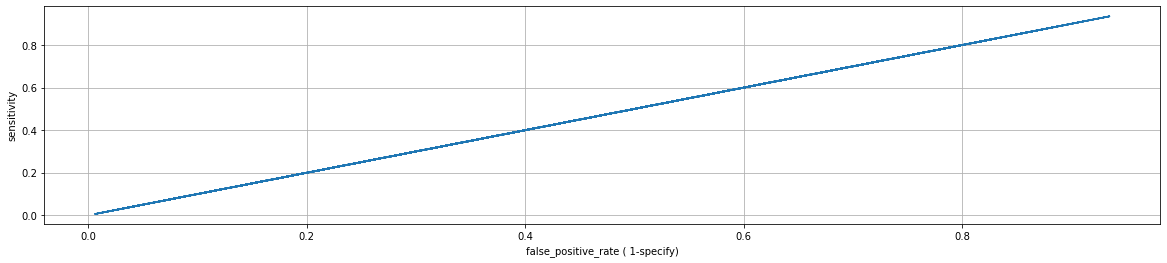

In [432]:
plt.figure(figsize=(20,4))
plt.plot(false_positive_rate,Sensitivity)
plt.xlabel('false_positive_rate' ' ( 1-specify)')
plt.ylabel('sensitivity')
plt.grid()
plt.show()